# Auditory oddball ERP experiment with pre-defined trial structure

In [1]:
# go up one folder to main notebooks folder

In [2]:
cd ..

C:\Users\john_griffiths\Code\libraries_of_mine\github\eeg-notebooks\notebooks


## Setup

In [8]:
from muselsl import stream, list_muses, view, record
from multiprocessing import Process
from mne import Epochs, find_events
from time import time, strftime, gmtime
import os
from stimulus_presentation import n170
from utils import utils
from collections import OrderedDict
import warnings
warnings.filterwarnings('ignore')

from scipy.io import loadmat

from sandbox import auditory_erp_arrayin

Load in trial structure

In [9]:
dm_file = 'sandbox/designMatrix.mat'
dm = loadmat(dm_file)['designMatrix'].T

In [5]:
stim_types = dm[:,0].astype(int)-1
stim_types

array([1, 1, 0, ..., 0, 0, 0])

In [6]:
itis = dm[:,2] * 0.001
itis

array([0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5])

Test run of stimulus delivery

In [7]:
trialses = auditory_erp_arrayin.present(duration=10,stim_types=stim_types,itis=itis)

7.3127 	WARNING 	We strongly recommend you activate the PTB sound engine in PsychoPy prefs as the preferred audio engine. Its timing is vastly superior. Your prefs are currently set to use ['sounddevice', 'PTB', 'pyo', 'pygame'] (in that order).
7.8635 	WARNING 	User requested fullscreen with size [1920 1080], but screen is actually [1366, 768]. Using actual size
9.5234 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead


In [10]:
trialses

,sound_ind,iti
0,1,0.5
1,1,0.5
2,0,0.5
3,1,0.5
4,1,0.5
...,...,...
1795,0,0.5
1796,0,0.5
1797,0,0.5
1798,0,0.5


## Collect EEG data

In [82]:
# Define these parameters 
duration = 60 # 120 # in seconds. 120 is recommended
subject = 1 # unique id for each participant
session = 1 # represents a data collection session. Multiple trials can be performed for each session

Seat the subject in front of the computer and run the following cell to run a single trial of the experiment.

In order to maximise the possibility of success, participants should take the experiment in a quiet environment and do their best to minimize movement that might contaminate the signal. With their jaw and face relaxed, subjects should focus on the stimuli, mentally noting whether they see a "face" or a "house".

Data will be recorded into CSV files in the `eeg-notebooks/data` directory

In [107]:
recording_path = os.path.join(os.path.split(os.getcwd())[0],'data', 'auditory', 'oddball_erp_arrayin', 
                              "subject" + str(subject), "session" + str(session), ("recording_%s.csv" %
                                              strftime("%Y-%m-%d-%H.%M.%S", gmtime())))
print('Recording data to: ', recording_path)
                                                                                   

Recording data to:  C:\Users\john_griffiths\Code\libraries_of_mine\github\eeg-notebooks\data\auditory\oddball_erp_arrayin\subject1\session1\recording_2020-03-13-21.44.37.csv


In [108]:
present_kwargs = {'duration': duration, 'stim_types': stim_types, 'itis': itis}

In [109]:
#stimulus = Process(target=n170.present, args=(duration,))
stimulus = Process(target=auditory_erp_arrayin.present, kwargs=present_kwargs)#(duration,stim_types,itis))

recording = Process(target=record, args=(duration, recording_path))

stimulus.start()
recording.start()

(Wait before running the next cell! )

In [110]:
assert os.path.isfile(recording_path)

## UP TO HERE

## Load and plot the data

In [111]:
#raw = utils.load_data('visual/N170', sfreq=256., 
#                      subject_nb=subject, session_nb=session)

In [112]:
import glob

In [113]:
recordings_dir = os.path.split(recording_path)[0]
recordings_files = glob.glob(os.path.join(recordings_dir, '*'))
recordings_files

['C:\\Users\\john_griffiths\\Code\\libraries_of_mine\\github\\eeg-notebooks\\data\\auditory\\oddball_erp_arrayin\\subject1\\session1\\recording_2020-03-13-19.23.15.csv',
 'C:\\Users\\john_griffiths\\Code\\libraries_of_mine\\github\\eeg-notebooks\\data\\auditory\\oddball_erp_arrayin\\subject1\\session1\\recording_2020-03-13-21.15.45.csv',
 'C:\\Users\\john_griffiths\\Code\\libraries_of_mine\\github\\eeg-notebooks\\data\\auditory\\oddball_erp_arrayin\\subject1\\session1\\recording_2020-03-13-21.19.43.csv',
 'C:\\Users\\john_griffiths\\Code\\libraries_of_mine\\github\\eeg-notebooks\\data\\auditory\\oddball_erp_arrayin\\subject1\\session1\\recording_2020-03-13-21.21.16.csv',
 'C:\\Users\\john_griffiths\\Code\\libraries_of_mine\\github\\eeg-notebooks\\data\\auditory\\oddball_erp_arrayin\\subject1\\session1\\recording_2020-03-13-21.22.45.csv',
 'C:\\Users\\john_griffiths\\Code\\libraries_of_mine\\github\\eeg-notebooks\\data\\auditory\\oddball_erp_arrayin\\subject1\\session1\\recording_2020-0

In [114]:
raw = utils.load_muse_csv_as_raw(recordings_files)

Creating RawArray with float64 data, n_channels=5, n_times=4968
    Range : 0 ... 4967 =      0.000 ...    19.402 secs
Ready.
Creating RawArray with float64 data, n_channels=5, n_times=15204
    Range : 0 ... 15203 =      0.000 ...    59.387 secs
Ready.
Creating RawArray with float64 data, n_channels=5, n_times=15204
    Range : 0 ... 15203 =      0.000 ...    59.387 secs
Ready.
Creating RawArray with float64 data, n_channels=5, n_times=15204
    Range : 0 ... 15203 =      0.000 ...    59.387 secs
Ready.
Creating RawArray with float64 data, n_channels=5, n_times=15204
    Range : 0 ... 15203 =      0.000 ...    59.387 secs
Ready.
Creating RawArray with float64 data, n_channels=5, n_times=15216
    Range : 0 ... 15215 =      0.000 ...    59.434 secs
Ready.
Creating RawArray with float64 data, n_channels=5, n_times=15204
    Range : 0 ... 15203 =      0.000 ...    59.387 secs
Ready.
Creating RawArray with float64 data, n_channels=5, n_times=15204
    Range : 0 ... 15203 =      0.000 ... 

### Visualizing the Power Spectrum

Plotting the power spectral density (PSD) of our dataset will give us a glimpse at the different frequencies that are present. We won't be able to see the N170 in the PSD, but it will give us an impression of how noisy our data was. A very noisy or flat PSD may represent poor signal quality at certain electrodes



Effective window size : 8.000 (s)


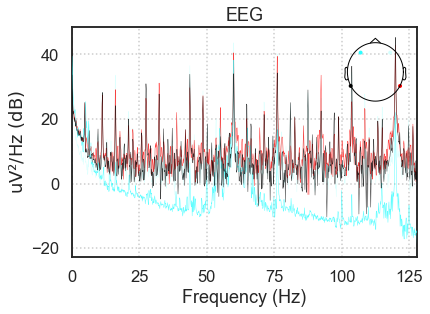

In [115]:
%matplotlib inline
raw.plot_psd();

### Filtering

Most ERP components are composed of lower frequency fluctuations in the EEG signal. Thus, we can filter out all frequencies between 1 and 30 hz in order to increase our ability to detect them.

Filtering raw data in 11 contiguous segments
Setting up band-pass filter from 1 - 30 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 30.00 Hz: -6.02, -6.02 dB

Effective window size : 8.000 (s)


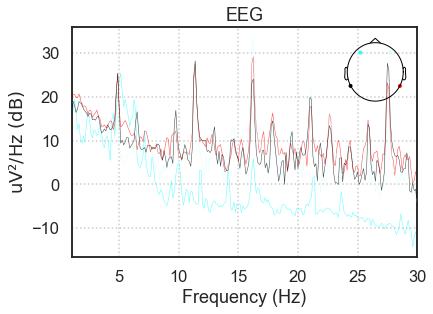

In [116]:
raw.filter(1,30, method='iir')
raw.plot_psd(fmin=1, fmax=30);

### Epoching

In [117]:
# Create an array containing the timestamps and type of each stimulus (i.e. face or house)
events = find_events(raw)
event_id = {'Standard': 2, 'Deviant': 1}

# Create an MNE Epochs object representing all the epochs around stimulus presentation
epochs = Epochs(raw, events=events, event_id=event_id, 
                tmin=-0.1, tmax=0.8, baseline=None,
                reject={'eeg': 75e-6}, preload=True, 
                verbose=False, picks=[0,1,2,3])
print('sample drop %: ', (1 - len(epochs.events)/len(events)) * 100)
epochs

1205 events found
Event IDs: [1 2]
sample drop %:  11.701244813278011


<Epochs  |   1064 events (all good), -0.101562 - 0.800781 sec, baseline off, ~7.5 MB, data loaded,
 'Deviant': 149
 'Standard': 915>

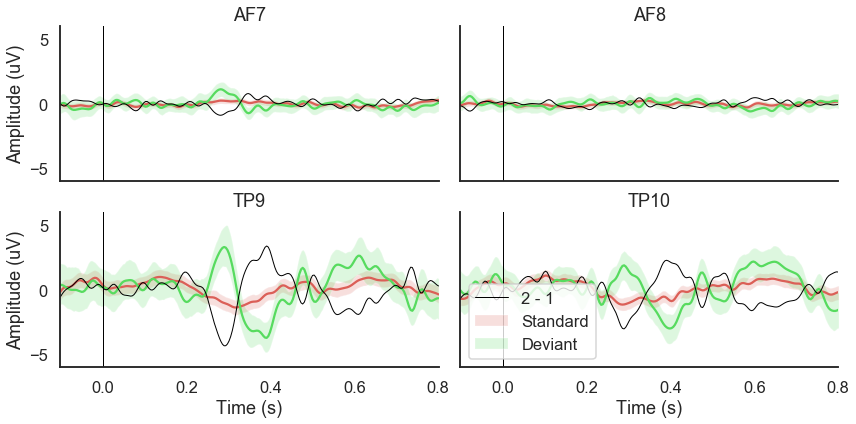

In [118]:
%matplotlib inline
conditions = OrderedDict()
conditions['Standard'] = [2]
conditions['Deviant'] = [1]

fig, ax = utils.plot_conditions(epochs, conditions=conditions, 
                                ci=97.5, n_boot=1000, title='',
                                diff_waveform=(1, 2))

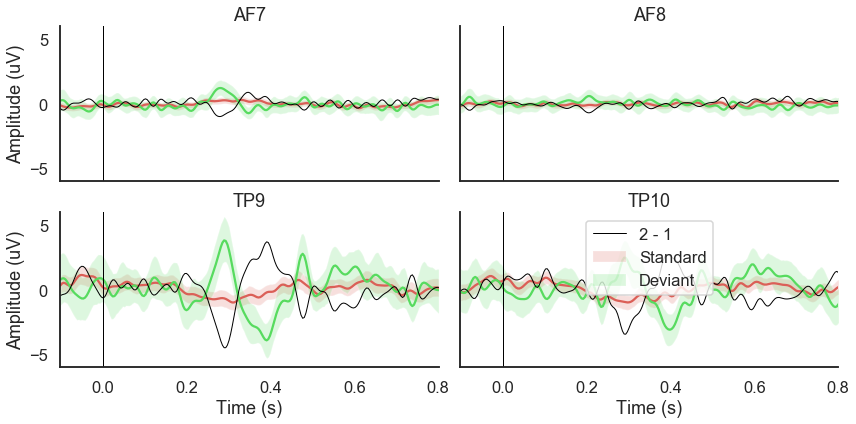

In [97]:
%matplotlib inline
conditions = OrderedDict()
conditions['Standard'] = [2]
conditions['Deviant'] = [1]

fig, ax = utils.plot_conditions(epochs, conditions=conditions, 
                                ci=97.5, n_boot=1000, title='',
                                diff_waveform=(1, 2))

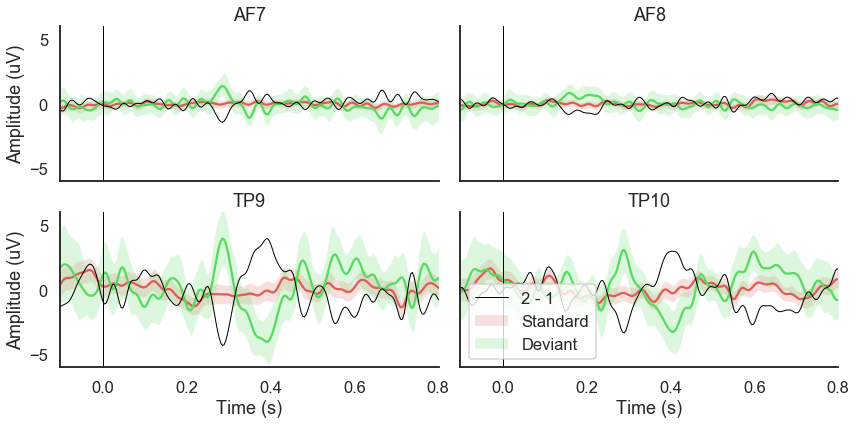

In [78]:
%matplotlib inline
conditions = OrderedDict()
conditions['Standard'] = [2]
conditions['Deviant'] = [1]

fig, ax = utils.plot_conditions(epochs, conditions=conditions, 
                                ci=97.5, n_boot=1000, title='',
                                diff_waveform=(1, 2))